In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import mne
mne.set_log_level(verbose=False)

from Datasets import *

In [4]:
path = "/media/usbdisk/data/ProyectoPSG/data/PSG1.edf"

In [5]:
dataset = EDFData_PTH(path)

In [ ]:
for a,b in dataset:
    break

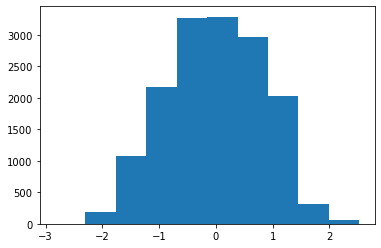

In [ ]:
plt.figure()
plt.hist(a[0])
plt.show()

In [2]:
import glob

In [3]:
import re 
import math
from pathlib import Path 

file_pattern = re.compile(r'.*?(\d+).*?')
def get_order(file):
    match = file_pattern.match(Path(file).name)
    if not match:
        return math.inf
    return int(match.groups()[0])

In [4]:
sorted_files = sorted(glob.glob("/media/usbdisk/data/ProyectoPSG/data/*.edf"), key=get_order)
sorted_files

['/media/usbdisk/data/ProyectoPSG/data/PSG1.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG2.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG3.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG4.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG5.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG6.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG7.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG8.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG9.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG10.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG11.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG12.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG13.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG14.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG15.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG16.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG17.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG18.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG19.edf',
 '/media/usbdisk/data/ProyectoPSG/data/P

In [5]:
sorted_files_no_10 = [a for a in sorted_files if re.findall(r'\d+', a)[0]!='10']
sorted_files_no_10

['/media/usbdisk/data/ProyectoPSG/data/PSG1.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG2.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG3.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG4.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG5.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG6.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG7.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG8.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG9.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG11.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG12.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG13.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG14.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG15.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG16.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG17.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG18.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG19.edf',
 '/media/usbdisk/data/ProyectoPSG/data/PSG20.edf']

In [6]:
datasets = [EDFData_PTH(path_glob, channels=["C3"]) for path_glob in tqdm(sorted_files_no_10)]

  0%|          | 0/19 [00:00<?, ?it/s]

In [7]:
dataset_concat = torch.utils.data.ConcatDataset(datasets)
len(dataset_concat)

15041

In [ ]:
test_size = 0.3
test_size = int(len(dataset_concat)*test_size)
train_size = len(dataset_concat) - test_size
train, test = torch.utils.data.random_split(dataset_concat, [train_size, test_size], generator=torch.Generator().manual_seed(42))
len(train), len(test)

(7898, 3384)

In [30]:
idx_train = np.loadtxt("../indices_train.txt").astype(int)
idx_test = np.loadtxt("../indices_test.txt").astype(int)
len(idx_train), len(idx_test)

(9776, 5265)

In [31]:
train_pablo = torch.utils.data.Subset(dataset_concat, indices=idx_train)
test_pablo = torch.utils.data.Subset(dataset_concat, indices=idx_test)
len(train_pablo), len(test_pablo), len(train_pablo)+len(test_pablo)

(9776, 5265, 15041)

In [16]:
labels = [datasets[0].id_to_class_dict[y.item()] for x,y in tqdm(dataset_concat)]
len(labels)

  0%|          | 0/15041 [00:00<?, ?it/s]

15041

In [17]:
from collections import Counter

In [18]:
Counter(labels)

Counter({'Sleep stage W': 2999,
         'Sleep stage N1': 863,
         'Sleep stage N2': 6388,
         'Sleep stage N3': 3286,
         'Sleep stage R': 1505})

In [32]:
trainloader = torch.utils.data.DataLoader(train_pablo, batch_size=32)
testloader = torch.utils.data.DataLoader(test_pablo, batch_size=32)
len(trainloader), len(testloader)

(306, 165)

In [33]:
train_pablo.indices

array([ 9805, 11803,  4395, ...,  8367,  4437,    97])

In [42]:
labels_train = []
labels_test = []

for x, y in tqdm(train_pablo):
    labels_train.append(datasets[0].id_to_class_dict[y.item()])
for x,y in tqdm(test_pablo):
    labels_test.append(datasets[0].id_to_class_dict[y.item()])

len(labels_train), len(labels_test)

  0%|          | 0/9776 [00:00<?, ?it/s]

  0%|          | 0/5265 [00:00<?, ?it/s]

(9776, 5265)

In [44]:
Counter(labels_train), Counter(labels_test)

(Counter({'Sleep stage N2': 4141,
          'Sleep stage N3': 2164,
          'Sleep stage N1': 565,
          'Sleep stage R': 963,
          'Sleep stage W': 1943}),
 Counter({'Sleep stage W': 1056,
          'Sleep stage N3': 1122,
          'Sleep stage R': 542,
          'Sleep stage N2': 2247,
          'Sleep stage N1': 298}))

In [46]:
for a in datasets:
    print(a.id_to_class_dict)

{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 3: 'Sleep stage R', 4: 'Sleep stage W'}
{0: 'Sleep stage N1', 1: 'Sleep stage N2', 2: 'Sleep stage N3', 

In [49]:
import torch.nn as nn

In [51]:
class TinySleepNet(nn.Module):
    def __init__(self, sampling_rate, channels, classes, input_length=15360):
        super(TinySleepNet, self).__init__()
        self.sampling_rate = sampling_rate
        self.channels = channels
        self.classes = classes
        self.input_shape = (len(channels), input_length)

        self.feature_extraction = nn.Sequential(*[
            nn.Conv1d(in_channels=len(channels), out_channels=128, kernel_size=sampling_rate//2, stride=sampling_rate//4),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=8, stride=8),
            nn.Conv1d(in_channels=128, out_channels=128, kernel_size=8, stride=1, padding=3),
            nn.ReLU(),
            nn.Conv1d(in_channels=128, out_channels=128, kernel_size=8, stride=1, padding=3),
            nn.ReLU(),
            nn.Conv1d(in_channels=128, out_channels=128, kernel_size=8, stride=1, padding=3),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=4, stride=4)
        ])

        self.lstm = nn.LSTM(input_size=128, hidden_size=128, batch_first=True)
        
        self.classifier = nn.Linear(128*2, classes)

    def forward(self, X):
        X = self.feature_extraction(X)
        # X, _ = self.lstm(X.permute(0,2,1))
        # X = X[:,-1,:]
        X = X.view(X.shape[0],-1)
        X = self.classifier(X)
        return X

    def calculate_flatten_shape(self):
        """
        Makes a forward pass with a dummy tensor to calculate the output shape
        from the feature_extraction block.
        """
        X = torch.ones(size=(1,*self.input_shape))
        with torch.no_grad():
            X = self.feature_extraction(X)
        return math.prod(X.shape)

In [77]:
model = TinySleepNet(512, ['C3', 'C4'], classes=5)
model

TinySleepNet(
  (feature_extraction): Sequential(
    (0): Conv1d(2, 128, kernel_size=(256,), stride=(128,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=8, stride=8, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(3,))
    (4): ReLU()
    (5): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(3,))
    (6): ReLU()
    (7): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(3,))
    (8): ReLU()
    (9): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (lstm): LSTM(128, 128, batch_first=True)
  (classifier): Linear(in_features=256, out_features=5, bias=True)
)

In [78]:
weights = []
for a in model.parameters():
    weights.extend(a.detach().numpy().ravel())
len(weights)

592645

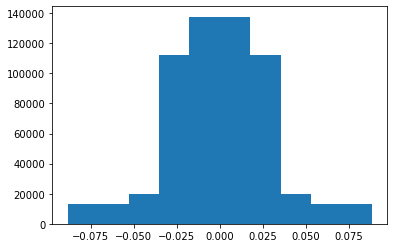

In [79]:
plt.figure()
plt.hist(weights)
plt.show()

In [80]:
def weights_init(m):
    if isinstance(m, nn.Conv1d) or isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight.data)
        if m.bias is not None:
            nn.init.zeros_(m.bias.data)

In [81]:
model.apply(weights_init)

TinySleepNet(
  (feature_extraction): Sequential(
    (0): Conv1d(2, 128, kernel_size=(256,), stride=(128,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=8, stride=8, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(3,))
    (4): ReLU()
    (5): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(3,))
    (6): ReLU()
    (7): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(3,))
    (8): ReLU()
    (9): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (lstm): LSTM(128, 128, batch_first=True)
  (classifier): Linear(in_features=256, out_features=5, bias=True)
)

In [82]:
weights = []
for a in model.parameters():
    weights.extend(a.detach().numpy().ravel())
len(weights)

592645

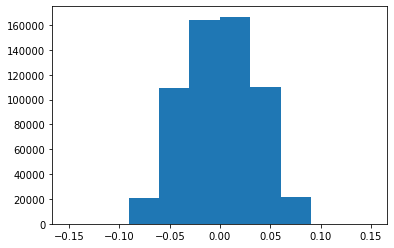

In [83]:
plt.figure()
plt.hist(weights)
plt.show()

In [47]:
from sklearn.metrics import f1_score